# Lab One Exploring the data
## Team member
Xiaoqing Zou, Jonathan Mejia, Rongwei Ji

## Data introduction
Data source: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster 

Data file name: Lab3/data/ObesityDataSet.csv

17 colums total, 2111 rows, it contains the categorical targets



## Preperation and Overview
### Task Explaination
This task is a classification problem designed to predict the degree of obesity based on given features (gender, age, height, weight, family history of obesity, smoking habits，etc). The degree of obesity can be categorized into several levels, such as Insufficient_Weight,Normal_Weight,Overweight_Level_I ,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III.


The business context of this task may lie in the healthcare sector, where doctors or health experts aim to assess the obesity risk of patients based on their features to develop personalized health management plans. Additionally, insurance companies might be interested as obesity can increase the risk of certain health issues, impacting insurance claim costs.


Stakeholders interested in the results include healthcare providers, health insurance companies, and individuals interested in managing their health. The model could be deployed in healthcare institutions or insurance company systems to assist decision-making or provide personalized recommendations.


### Data preperation
For this task, we would prepare our dataset by selecting relevant features such as gender, age, height, weight, family history of obesity, smoking habits,etc. We have do something preparation in Lab1 assignement, which I use the dataset for this lab3 assignment. After preprocessing, we will have a final dataset ready for classification.

In [2]:
# we could start with the lab1 data and show the preperation visualisation.
import pandas as pd
import numpy as np


print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

df = pd.read_csv('ObesityDataSetOriginal.csv') # read in the csv file
print(df.info())
df.head()

Pandas: 1.5.3
Numpy: 1.26.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF   

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Data understanding
In the lab1 we have already know much about this dataset, and there are several attributes can contribute our target class( `NOBeyesdad`) and now we still can do something about the encoding to make them all numerical. After that we can using the regression to do test.

#### Encoding
We still need make all data are numeric, this part can directly using the code from our lab1 assignment.



In [3]:
df.replace(to_replace=['no','Sometimes','Frequently','Always','yes'],value=[0,1,2,3,1],inplace=True)
df.replace(to_replace=['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'],value=[1,2,3,4,0,5,6],inplace=True)
df.replace(to_replace=['Female','Male'],value=[0,1],inplace=True)
df.replace(to_replace=['Public_Transportation','Walking', 'Automobile', 'Motorbike', 'Bike'],value=[1,2,3,4,5],inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,1,3


In [4]:
df_describe=pd.DataFrame()
pd.set_option('max_colwidth',200)
df_describe['Attribute']=df.columns
df_describe['Description']=['Gender','Age','Height','Weight','family',
                            'Frequent consumption of high caloric food',
                            'Frequency of consumption of vegetables',
                            'Number of main meals',
                            'Consumption of food between meals',
                            'SMOKE',
                            'Consumption of water daily','Calories consumption monitoring',
                            "Physical activity frequency",
                          
                            "Time using technology devices",
                            "Consumption of alcohol",
                            "Transportation used","Obeyesdad"]
df_describe['Type']=['Bool,1/0','Interval,float','Ratio,float','Ratio,float','Bool,1/0','ratio,float','ratio,float','ratio,float','ratio,float',"Bool,1/0","Ordinal,int","Bool,1/0","ratio,float","ratio,float","Ordinal,int","norminal","Ordinal,int"]
df_describe['Convertion/Range']=['1=male,0=female',"14-65",'1.45-1.98','39-173','yes=1.no=0','1-3','1-3','1-3','0=no,1=sometimes,2=frequently,3=always','yes=1.no=0','1-3','yes=1.no=0','0-3','0-2','0=no,1=sometimes,2=frequently,3=always','','Normal_Weight=1,Overweight_Level_I=2 ,Overweight_Level_II=3,Obesity_Type_I=4, Insufficient_Weight=0,Obesity_Type_II=5,Obesity_Type_III=6']
df_describe

,Attribute,Description,Type,Convertion/Range
0,Gender,Gender,"Bool,1/0","1=male,0=female"
1,Age,Age,"Interval,float",14-65
2,Height,Height,"Ratio,float",1.45-1.98
3,Weight,Weight,"Ratio,float",39-173
4,family_history_with_overweight,family,"Bool,1/0",yes=1.no=0
5,FAVC,Frequent consumption of high caloric food,"ratio,float",1-3
6,FCVC,Frequency of consumption of vegetables,"ratio,float",1-3
7,NCP,Number of main meals,"ratio,float",1-3
8,CAEC,Consumption of food between meals,"ratio,float","0=no,1=sometimes,2=frequently,3=always"
9,SMOKE,SMOKE,"Bool,1/0",yes=1.no=0


Above table is currently data table, at this time we do not need to something missing handling and duplicate issue handling. We could focuing on the modeling and our main target.

`NObeyesdad` is our target for classification, and below is breakdown and distribution about this target of this dataset:

In [7]:
df.describe() # show the summary statistics

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,1.488394,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.868475,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,1.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,1.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,2.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,5.000000,6.000000


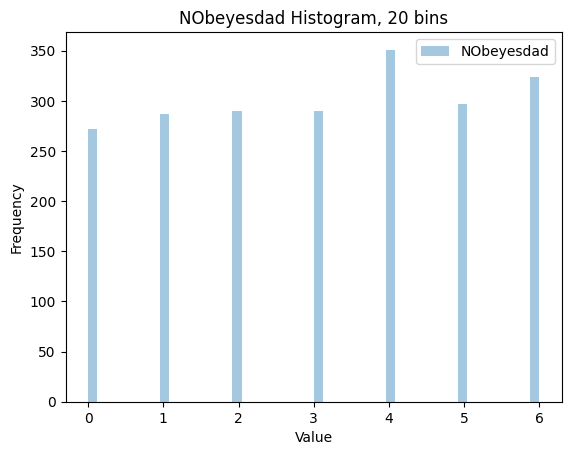

In [6]:
import matplotlib.pyplot as plt

df.NObeyesdad.plot(kind='hist',bins=50,alpha=0.4,label='NObeyesdad')
plt.title('NObeyesdad Histogram, 20 bins')
plt.xlabel("Value")
plt.legend()
plt.show()


### Data Splitting
We will split our dataset into training and testing sets using an 80/20 split, where 80% of the data will be used for training the model and 20% for testing its performance. This split is appropriate as it provides an adequate amount of data for training while still reserving a sizable portion for evaluation. With a larger training set, the model can learn more complex patterns in the data, leading to potentially better performance. However, it's essential to ensure that the testing set is representative of the overall data distribution to obtain reliable performance metrics.

In [8]:
# convert data into 80/20 split
from sklearn.model_selection import train_test_split
# define x and y of dataset
x = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']
# split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



Original: (2111, 16) (2111,)


### Argue "for" or "against" 80/20split
When we use the 80/20 split function to train model and test the model, we should consider the data balance or imbalance. Then we could determin is argueing or argue against the 80/20 split.

Now show the distribution about train and test

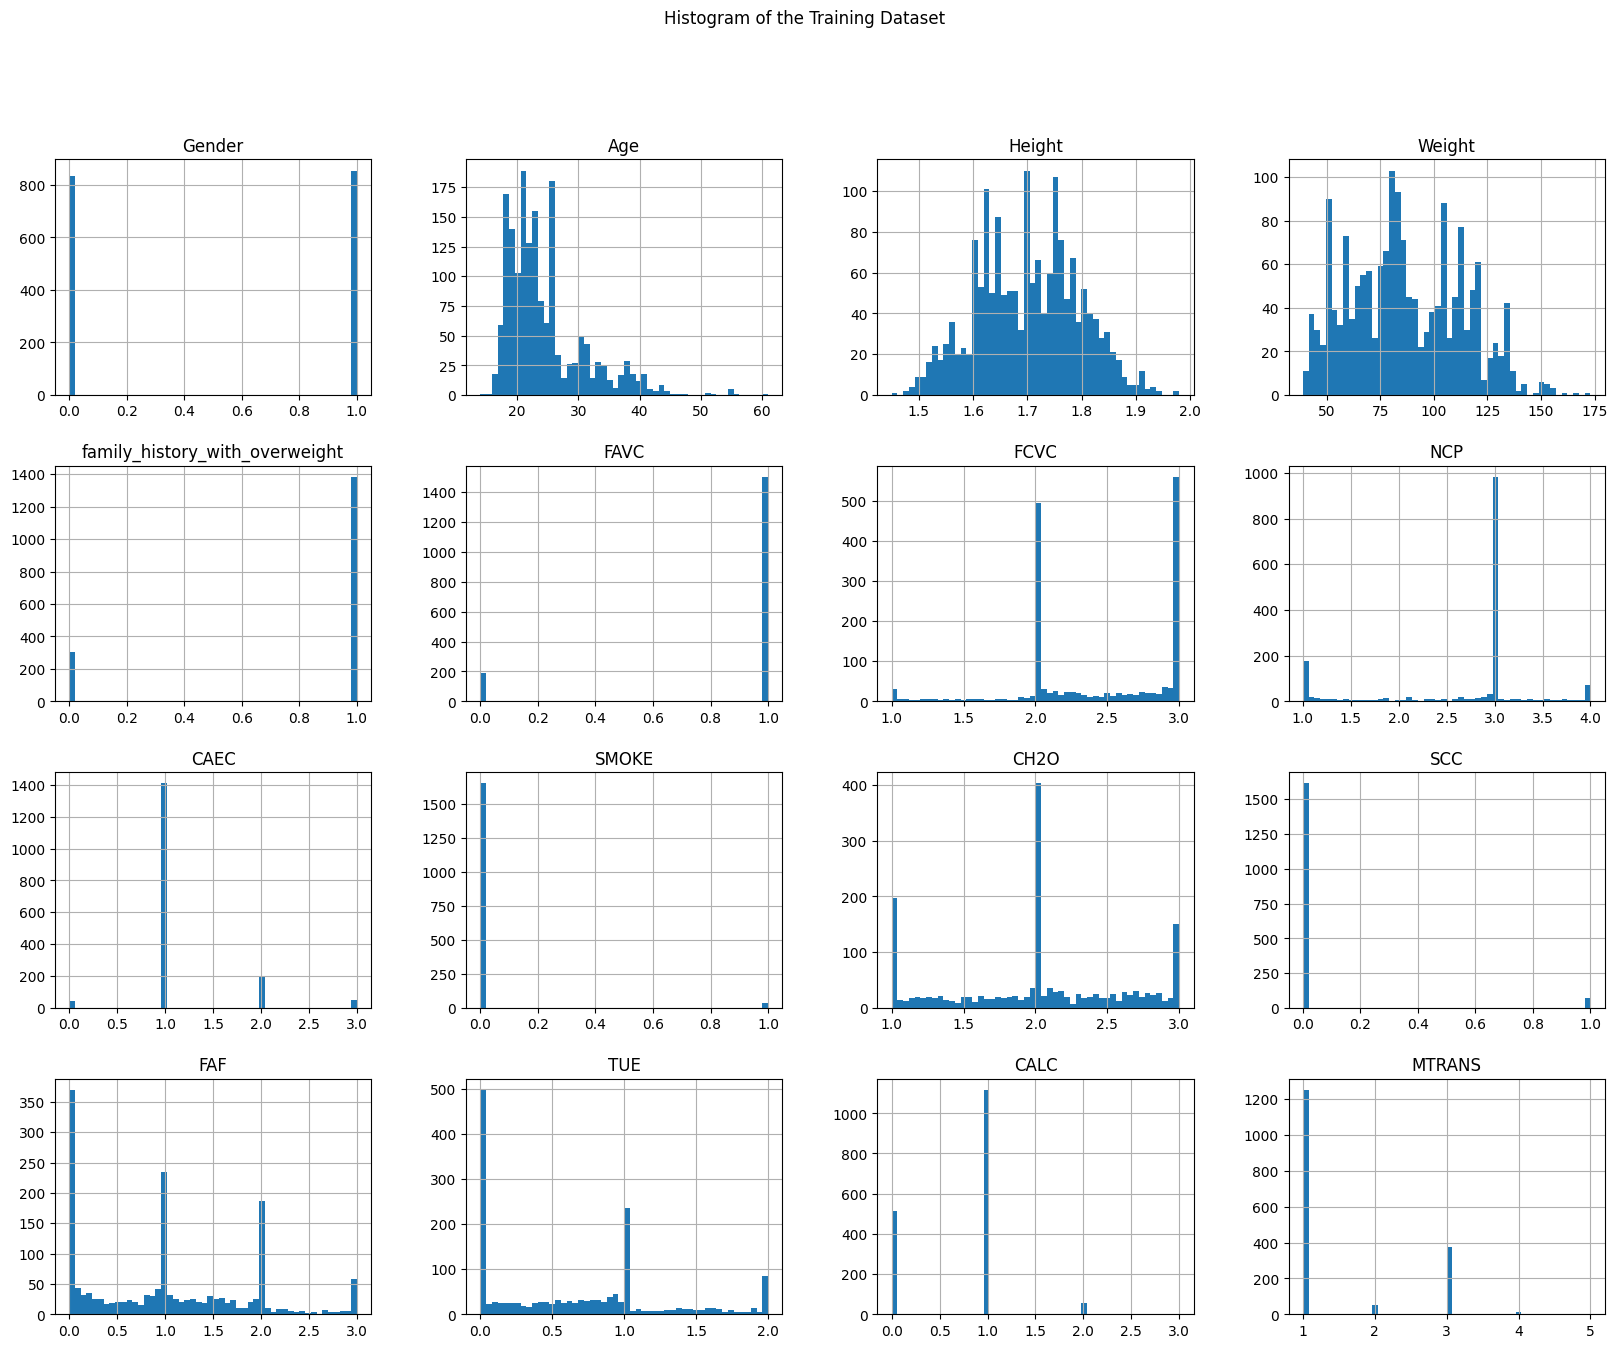

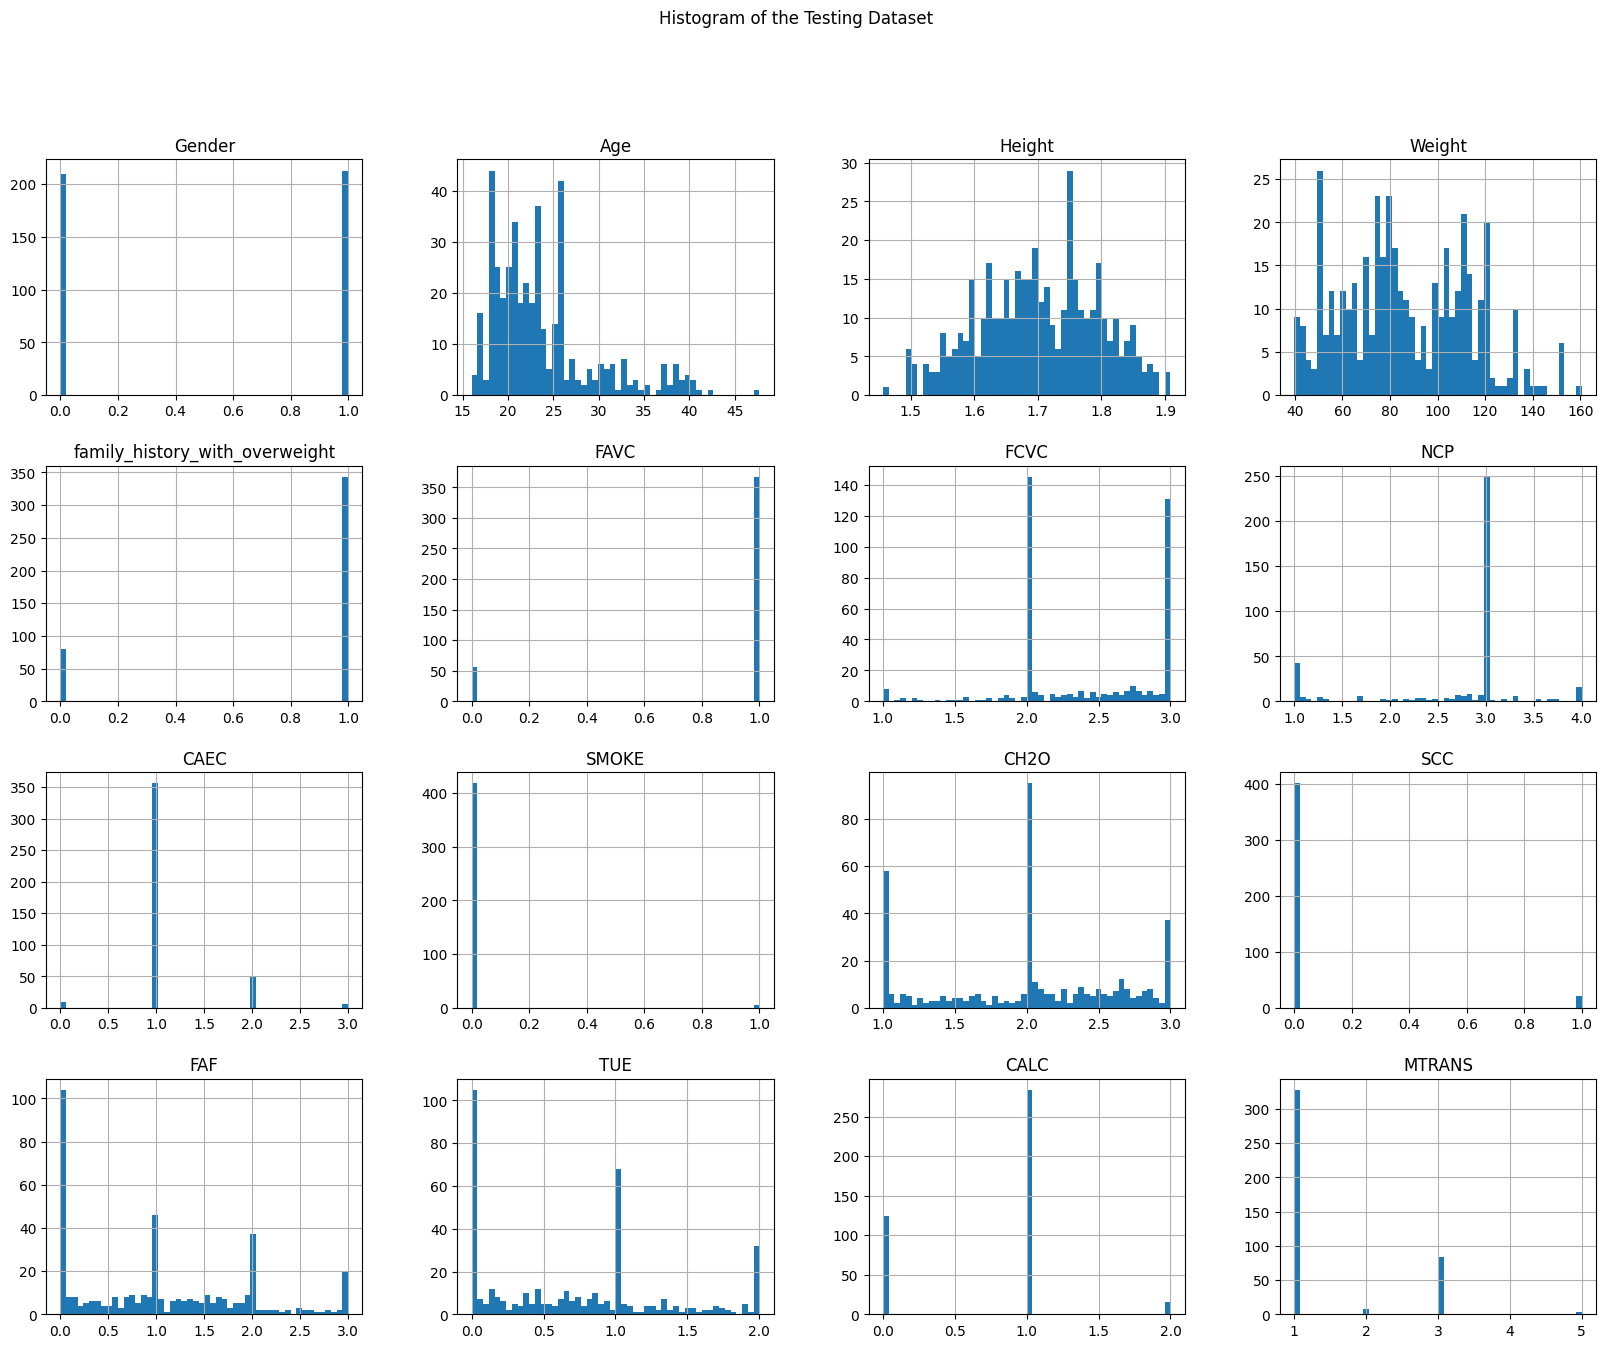

In [9]:
# show the x_train dataset distribution and x_test dataset distribution.
import matplotlib.pyplot as plt
# plot the histogram of the training dataset
x_train.hist(bins=50, figsize=(20,15))
plt.suptitle('Histogram of the Training Dataset')
plt.show()
# plot the histogram of the testing dataset
x_test.hist(bins=50, figsize=(20,15))
plt.suptitle('Histogram of the Testing Dataset')
plt.show()


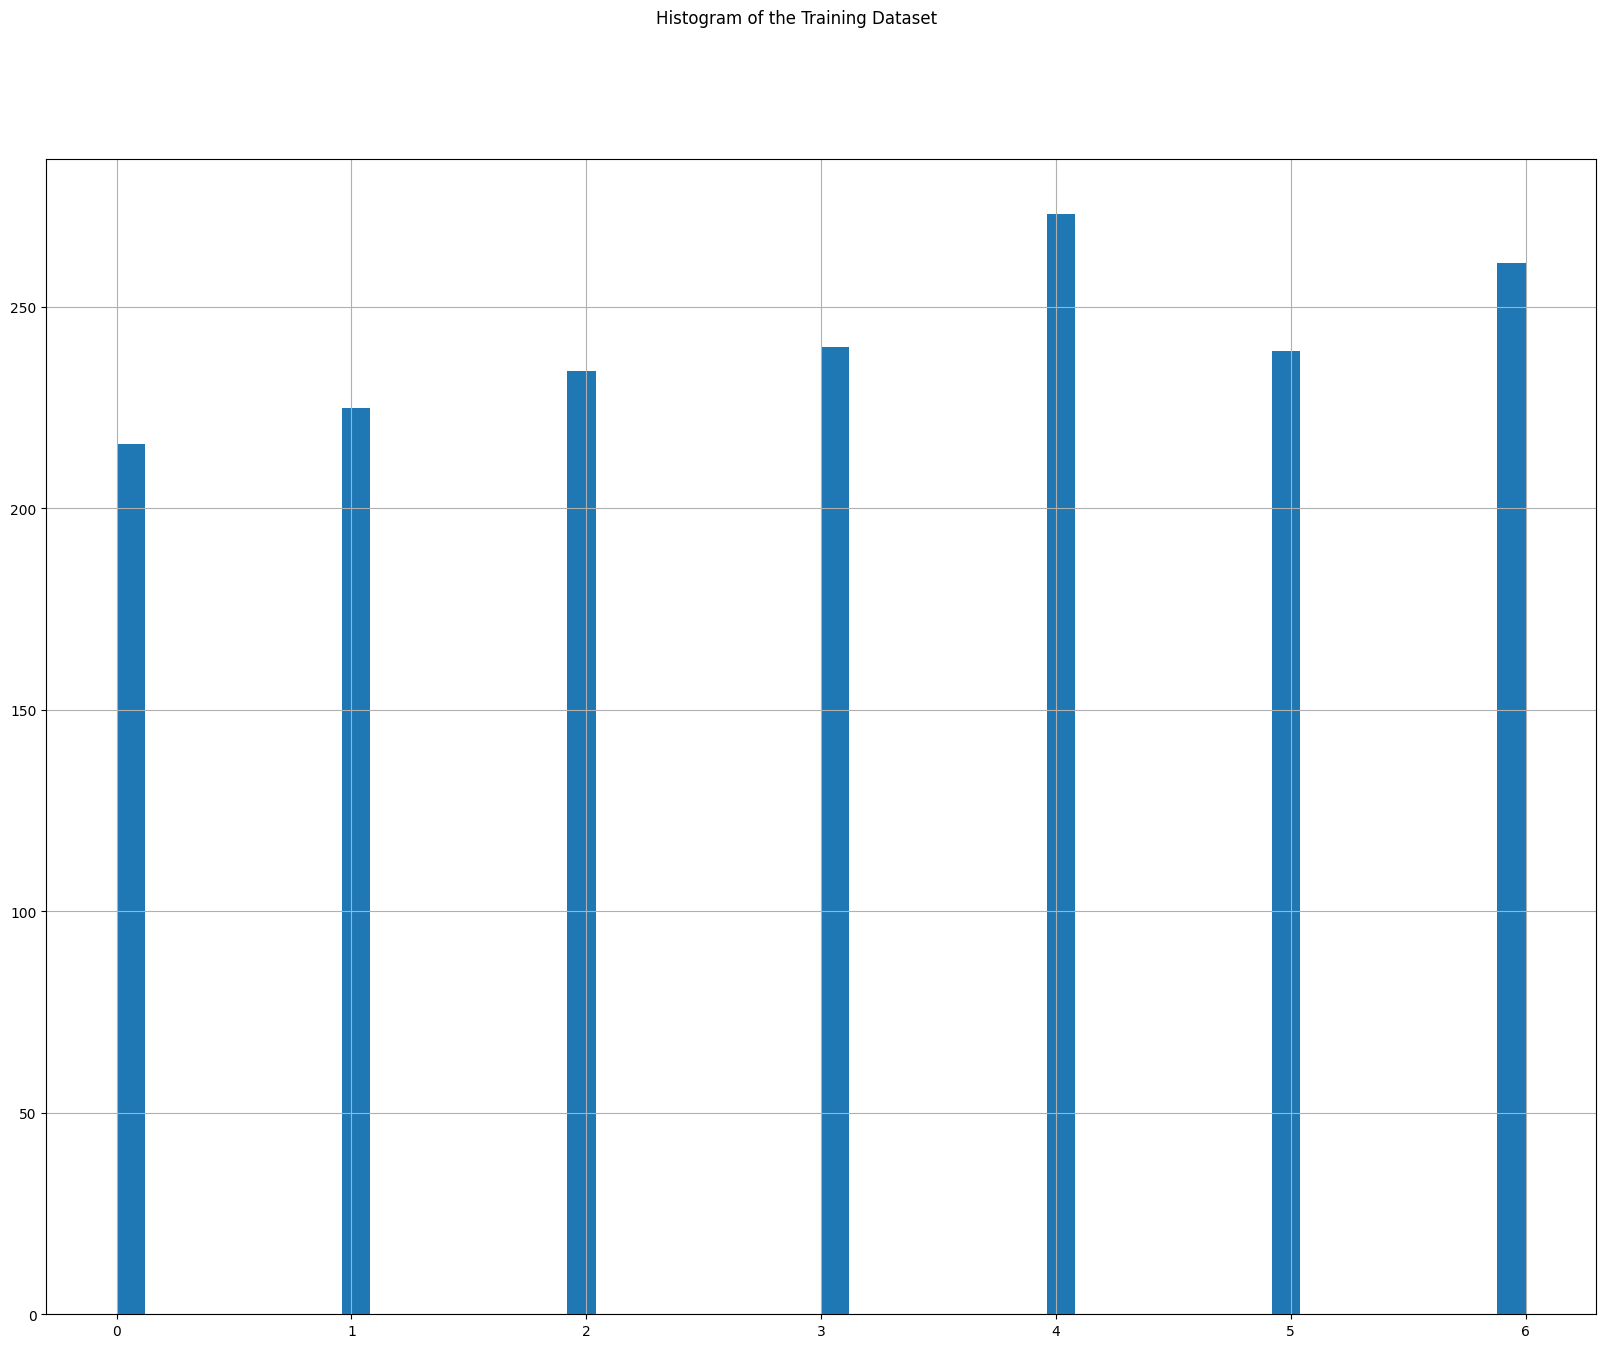

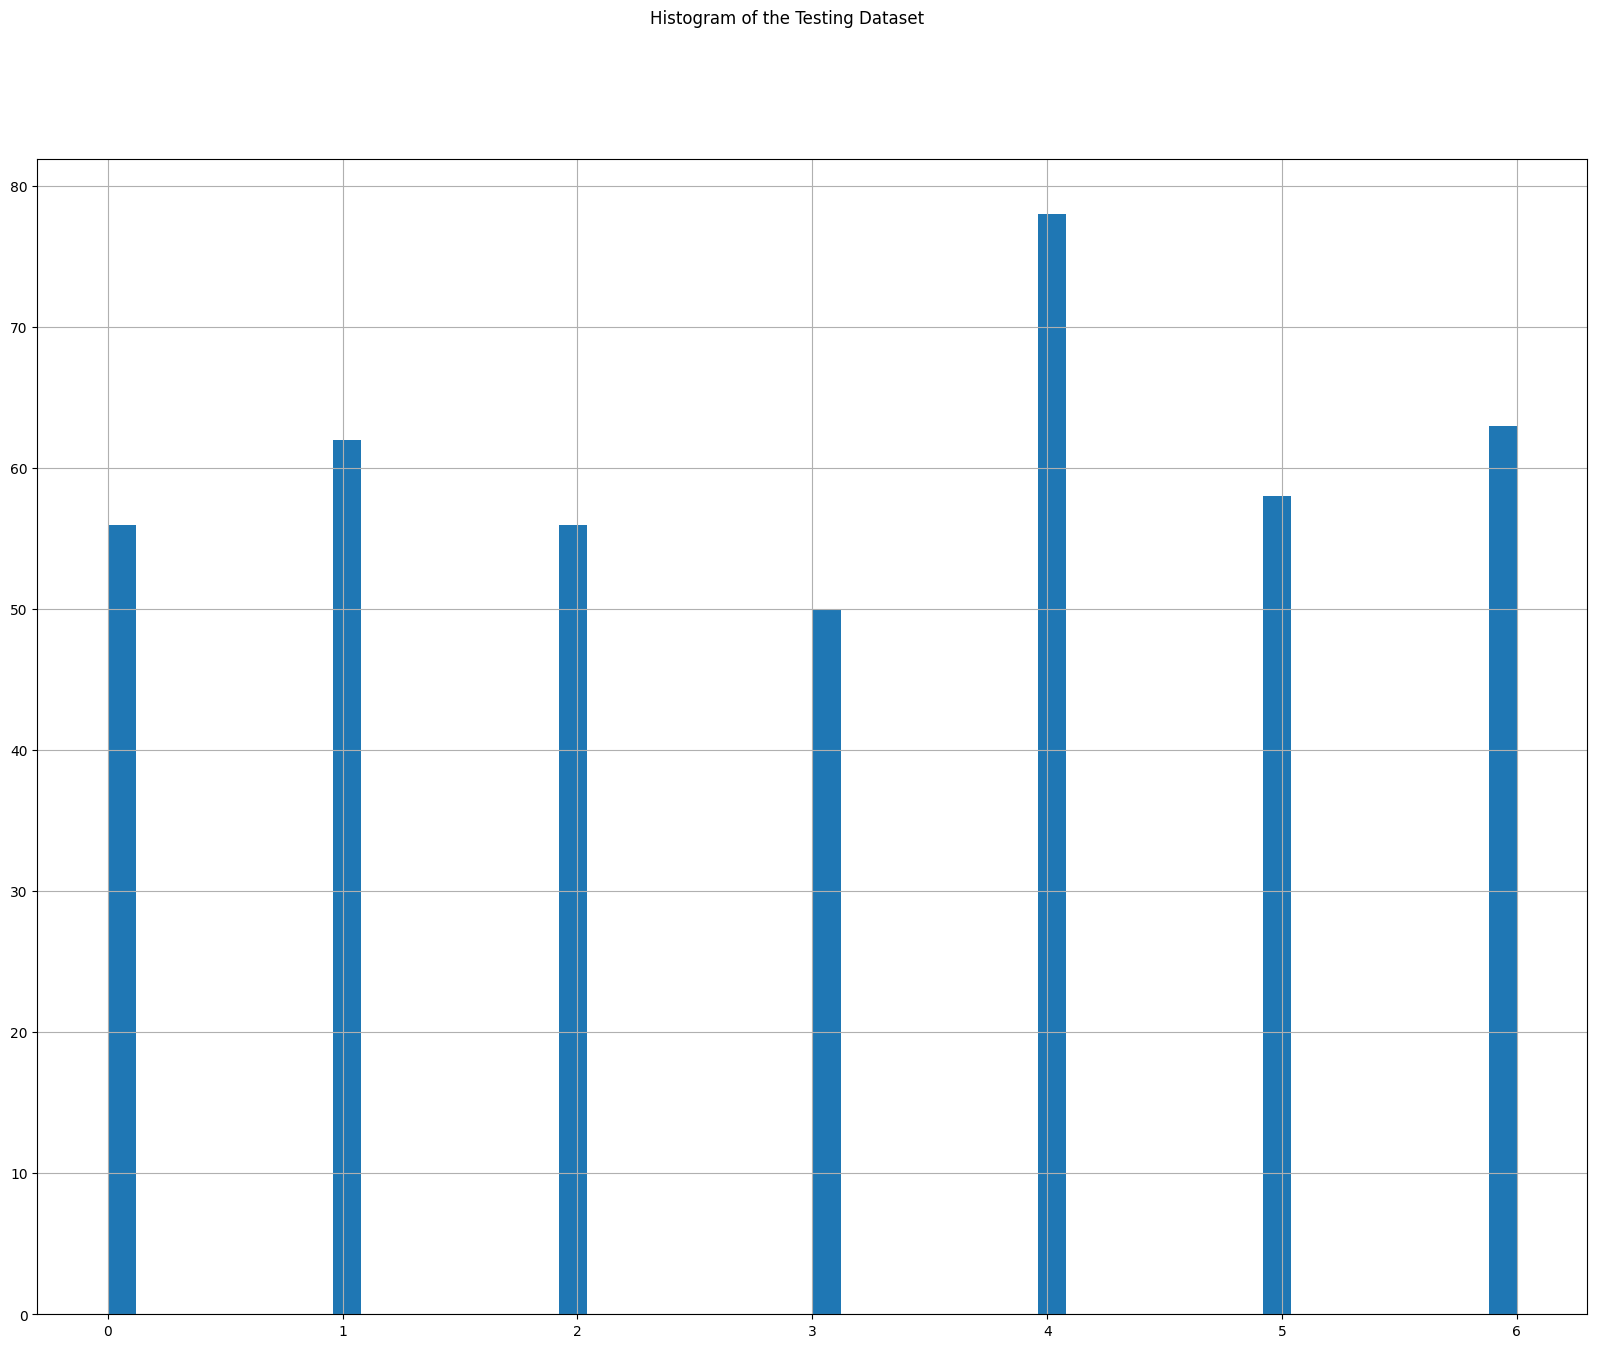

In [10]:
# show the y_train dataset distribution and y_test dataset distribution.
import matplotlib.pyplot as plt
# plot the histogram of the training dataset
y_train.hist(bins=50, figsize=(20,15))
plt.suptitle('Histogram of the Training Dataset')
plt.show()
# plot the histogram of the testing dataset
y_test.hist(bins=50, figsize=(20,15))
plt.suptitle('Histogram of the Testing Dataset')
plt.show()


Based on the visualizaiton of the distribution of train and test, we could find 80/20 will be good split ratio to build and test model. There is no any extremly imbalance.

## Modeling


Refrence:
Our teams lab1 assignment:https://github.com/livingspring/CS7324As/blob/main/Lab1/LabOne.ipynb